In [1]:
# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read differential contacts data that has produced by selfish
contacts = pd.read_table("/home/gyk/project/lw_hic_snHiC/12_Grouped_analyses/G_Differential_contacts_analyses_SELFISH/Ava_vs_DZ/Ava_vs_DZ_1kb_SELFISH.txt", header=0)
contacts.head()

,CHR1,LOC1_start,LOC1_end,CHR2,LOC2_start,LOC2_end,Q_VAL,LOG_FOLD_CHANGE
0,2,42000,43000,2,48000,49000,0.000292,-0.135392
1,2,42000,43000,2,49000,50000,0.005144,-0.116783
2,2,43000,44000,2,47000,48000,0.043137,-0.091639
3,2,43000,44000,2,48000,49000,0.007820,-0.333696
4,2,43000,44000,2,49000,50000,0.023208,-0.461461


In [3]:
# Read ATAC differential peaks data
atac = pd.read_table("/home/gyk/project/lw_atac_nf/analysis/results/DZ_Ava_diff_consensus_peaks.bed", header=0)
atac['mid'] = (atac['End']+atac['Start'])//2
atac.head()

,Chr,Start,End,PeakID,Nearest PromoterID,Strand,mid
0,chr26,5382289,5382643,Interval_28310,KWMTBOMO15659,+,5382466
1,chr25,7012973,7013510,Interval_27225,KWMTBOMO15220,+,7013241
2,chr26,1799034,1799431,Interval_27963,KWMTBOMO15523,+,1799232
3,chr27,3460077,3460719,Interval_29245,KWMTBOMO15946,+,3460398
4,chr18,13571588,13573172,Interval_15722,KWMTBOMO11121,+,13572380


In [4]:
# filter contacts accoding to peak mid location
filtered_contacts = pd.DataFrame()
for i in atac.itertuples():
    for j in contacts.itertuples():
        if (i.mid >= j.LOC1_start and i.mid <= j.LOC1_end) or (i.mid >= j.LOC2_start and i.mid <= j.LOC2_end):
            combined_row = {**i._asdict(), **j._asdict()}
            filtered_contacts = pd.concat([filtered_contacts, pd.DataFrame([combined_row])], ignore_index=True)

print(len(filtered_contacts["_5"].unique()))
filtered_contacts.head()

225


,Index,Chr,Start,End,PeakID,_5,Strand,mid,CHR1,LOC1_start,LOC1_end,CHR2,LOC2_start,LOC2_end,Q_VAL,LOG_FOLD_CHANGE
0,1699,chr26,5382289,5382643,Interval_28310,KWMTBOMO15659,+,5382466,7,5376000,5377000,7,5382000,5383000,0.000122,-0.263116
1,1700,chr26,5382289,5382643,Interval_28310,KWMTBOMO15659,+,5382466,7,5377000,5378000,7,5382000,5383000,0.006760,-0.175971
2,3108,chr25,7012973,7013510,Interval_27225,KWMTBOMO15220,+,7013241,11,7009000,7010000,11,7013000,7014000,0.007651,-1.001000
3,3109,chr25,7012973,7013510,Interval_27225,KWMTBOMO15220,+,7013241,11,7010000,7011000,11,7013000,7014000,0.022884,-0.116591
4,225,chr26,1799034,1799431,Interval_27963,KWMTBOMO15523,+,1799232,4,1793000,1794000,4,1799000,1800000,0.003550,-0.100919


In [11]:
print(len(filtered_contacts["_5"].unique()))
geneid = filtered_contacts["_5"].unique()
geneid = pd.DataFrame(geneid, columns=["Unique_Values"])
geneid.to_csv("ATAC_HiC_geneid.csv", index=False, sep="\t", header=False)
frenquency = filtered_contacts["CHR1"].value_counts()
frenquency.sort_index(ascending=False)
frenquency

225


CHR1
15    68
4     46
12    36
11    36
19    27
25    26
8     26
16    25
22    22
14    22
9     21
26    21
27    21
5     19
20    15
23    15
7     13
13    11
28     6
18     2
2      2
6      2
Name: count, dtype: int64

/tmp/ipykernel_2412612/1724422760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frenquency.index, y=frenquency.values, palette="muted")


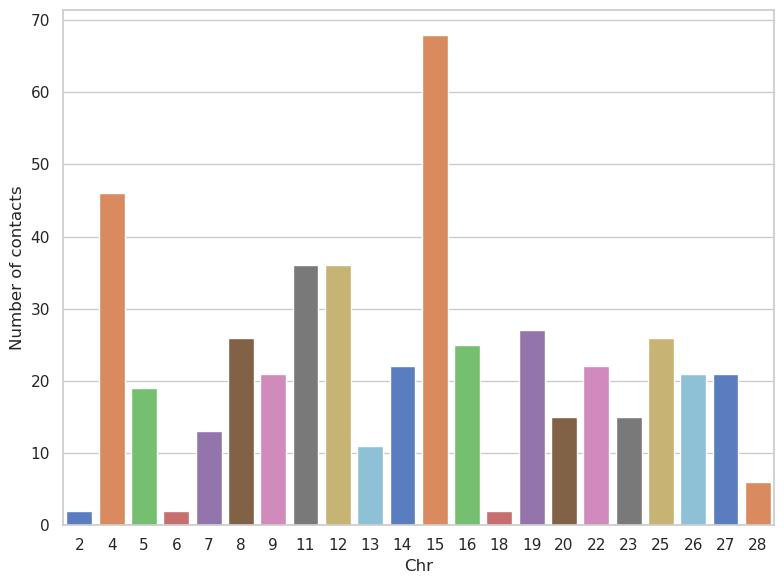

In [25]:
# 设置CNS风格
sns.set_theme(style="whitegrid", palette="muted")

# 绘制频率直方图
plt.figure(figsize=(8, 6))
sns.barplot(x=frenquency.index, y=frenquency.values, palette="muted")

plt.xlabel("Chr")
plt.ylabel('Number of contacts')
plt.title('')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# # 保存图表
# plt.savefig("analysis/results/promoter_distance_frequency.pdf", dpi=720, bbox_inches="tight")
# 显示图表
plt.show()